# Querying RACMO Snowmelt nearest grid cell value at a given geographic coordinate

### and sum or average the data within that region. 

#### multiply the cell area by the melt amount to get a volume for each cell (that is then either summed or averaged). 

### Import Packages

In [1]:
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
from pathlib import Path

%config InlineBackend.figure_format='retina'

In [2]:
parent = Path().resolve().parent
notebook_path = Path('.')
data_path = parent / 'data'
output_path = parent / 'outputs'
figure_path = parent / 'figures'

### Take a look at the data (RACMO Snowmelt)

In [3]:
ds =xr.open_dataset(data_path/'RACMO2.3p2_ANT27_snowmelt_daily_2011_2019_08.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:       (bnds: 2, height: 1, nblock1: 40, nblock2: 400, rlat: 240, rlon: 262, time: 3165)
Coordinates:
    lon           (rlat, rlon) float64 ...
    lat           (rlat, rlon) float64 ...
  * rlon          (rlon) float64 -32.75 -32.5 -32.25 -32.0 ... 32.0 32.25 32.5
  * rlat          (rlat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.25 29.5 29.75
  * height        (height) float64 0.0
  * time          (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2019-08-31
Dimensions without coordinates: bnds, nblock1, nblock2
Data variables:
    dir           (rlat, rlon) float64 ...
    block1        (nblock1) int32 ...
    block2        (nblock2) int32 ...
    time_bnds     (time, bnds) datetime64[ns] ...
    dtg           (time) int32 ...
    date_bnds     (time, bnds) int32 ...
    hms_bnds      (time, bnds) int32 ...
    assigned      (time) int32 ...
    rotated_pole  float32 ...
    snowmelt      (time, height, rlat, rlon) float32 ...
Attributes:
    Conventions:   CF-1.4
    source:        RACMO2
    Domain:        ANT27
    Experiment:    ERAINx_RACMO2.4.1
    institution:   Royal Netherlands Meteorological Institute (KNMI)
    CreationDate:  Mon Sep 16 21:37:02 2019
    comment:       asim2cdf: cpar=snowmelt, iwmo=218, ilvt=105, ilev=0, idh=2...
    title:         Snow Melt Flux

### Get rid of height using squeeze

In [5]:
snowmelt = ds.snowmelt.squeeze()
snowmelt

<xarray.DataArray 'snowmelt' (time: 3165, rlat: 240, rlon: 262)>
[199015200 values with dtype=float32]
Coordinates:
    lon      (rlat, rlon) float64 -126.9 -127.1 -127.3 ... 52.84 53.03 53.23
    lat      (rlat, rlon) float64 -46.75 -46.92 -47.09 ... -47.42 -47.24 -47.07
  * rlon     (rlon) float64 -32.75 -32.5 -32.25 -32.0 ... 31.75 32.0 32.25 32.5
  * rlat     (rlat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.0 29.25 29.5 29.75
    height   float64 0.0
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2019-08-31
Attributes:
    standard_name:  snowmelt
    long_name:      Snow Melt Flux
    units:          kg m-2 s-1
    cell_methods:   time: 24-hr averaged values
    grid_mapping:   rotated_pole

### Select a date as ```data``` so it is easier to work with/plot, in this case 2014-01-01

In [6]:
data = snowmelt.sel(time='2014-01-01')
data

<xarray.DataArray 'snowmelt' (rlat: 240, rlon: 262)>
array([[-2.885277e-08, -2.885277e-08, -2.885277e-08, ..., -2.885277e-08,
        -2.885277e-08, -2.885277e-08],
       [-2.885277e-08, -2.885277e-08, -2.885277e-08, ..., -2.885277e-08,
        -2.885277e-08, -2.885277e-08],
       [-2.885277e-08, -2.885277e-08, -2.885277e-08, ..., -2.885277e-08,
        -2.885277e-08, -2.885277e-08],
       ...,
       [-2.885277e-08, -2.885277e-08, -2.885277e-08, ..., -2.885277e-08,
        -2.885277e-08, -2.885277e-08],
       [-2.885277e-08, -2.885277e-08, -2.885277e-08, ..., -2.885277e-08,
        -2.885277e-08, -2.885277e-08],
       [-2.885277e-08, -2.885277e-08, -2.885277e-08, ..., -2.885277e-08,
        -2.885277e-08, -2.885277e-08]], dtype=float32)
Coordinates:
    lon      (rlat, rlon) float64 -126.9 -127.1 -127.3 ... 52.84 53.03 53.23
    lat      (rlat, rlon) float64 -46.75 -46.92 -47.09 ... -47.42 -47.24 -47.07
  * rlon     (rlon) float64 -32.75 -32.5 -32.25 -32.0 ... 31.75 32.0 32.25 32.5
  * rlat     (rlat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.0 29.25 29.5 29.75
    height   float64 0.0
    time     datetime64[ns] 2014-01-01
Attributes:
    standard_name:  snowmelt
    long_name:      Snow Melt Flux
    units:          kg m-2 s-1
    cell_methods:   time: 24-hr averaged values
    grid_mapping:   rotated_pole

# In this example, the coordinate we are using is Lake D on Amery ice shelf (72.5416, -70.5911)

In [7]:
aoi_lon = 72.5416 
aoi_lat = -70.5911
# define rotated pole projection
rp = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)
# transform AOI coordinate into rotated pole projection
aoi_rp = rp.transform_point(aoi_lon, aoi_lat, ccrs.PlateCarree())
# query nearest grid cell value
aoi_near = snowmelt.sel(rlon=aoi_rp[0], rlat =aoi_rp[1], method ='nearest')

## Plot the AOI at nearest grid cell
## Remember to change the map extent accordingly using ```set_extent``` 

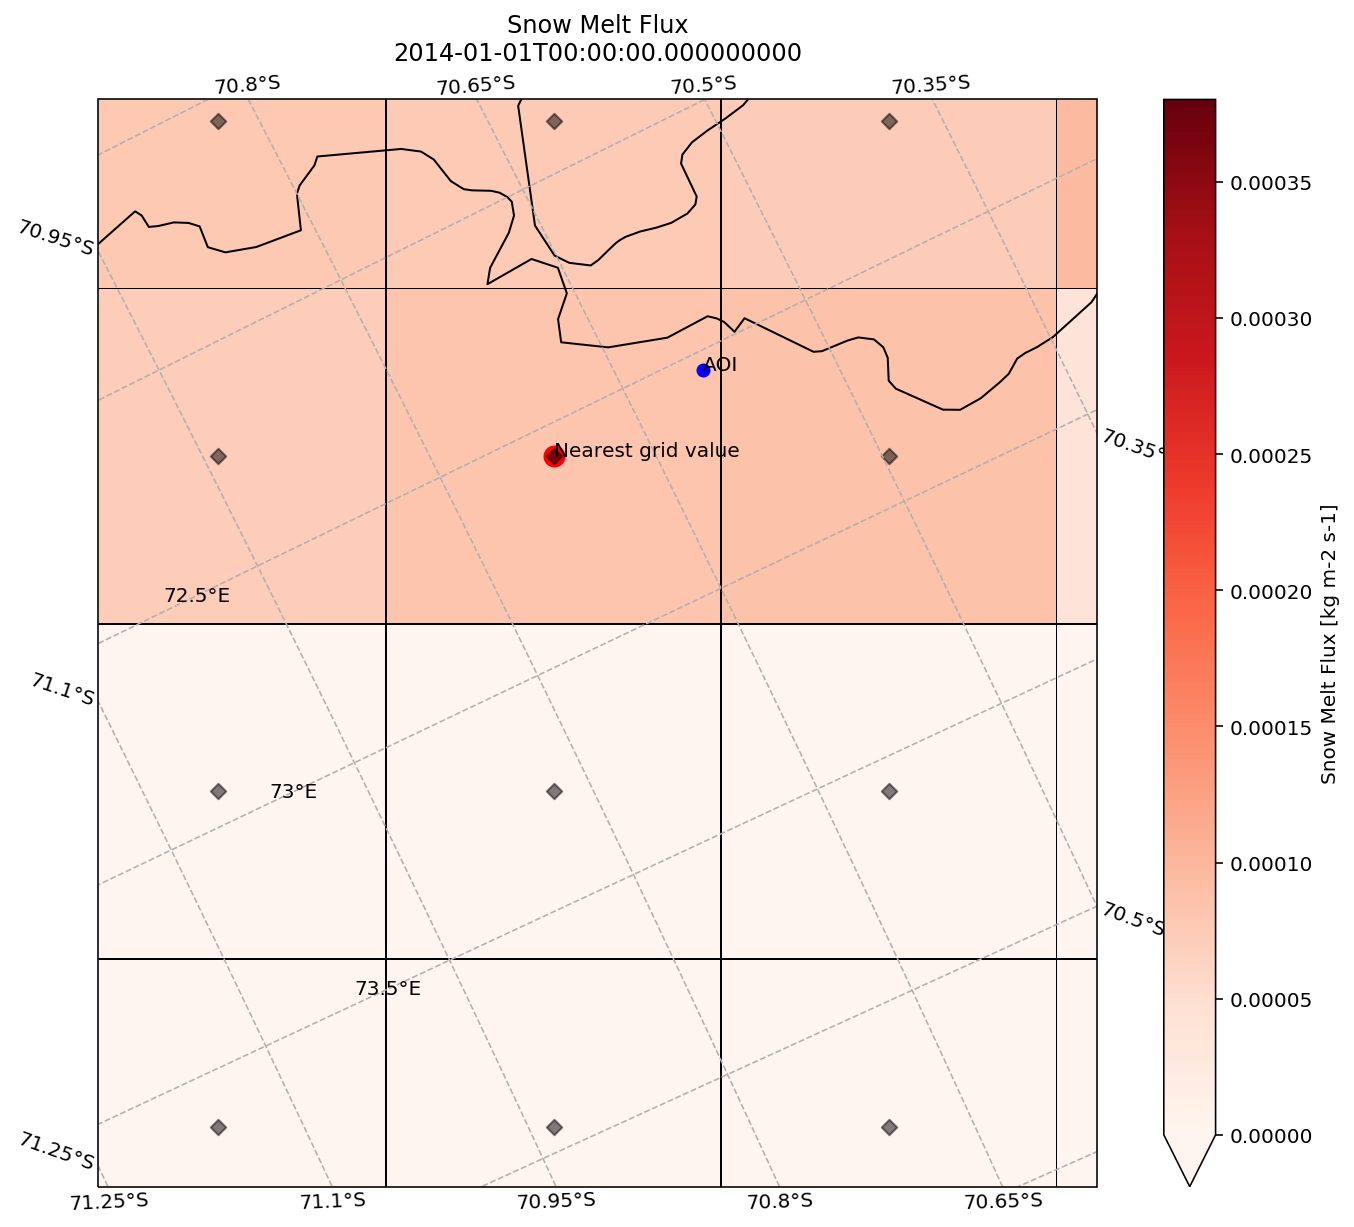

In [8]:
plt.figure(figsize=(12,10))
# plot data in rotated pole projection
ax = plt.subplot(projection=rp)
# set extent to Amery (lon, lat)
ax.set_extent([72,74,-71,-70.5], crs = ccrs.PlateCarree())

data.plot(ax=ax,transform=rp, cmap='Reds', vmin=0, edgecolor='k', linewidth=0.3)
# plot nearest grid point
ax.scatter(aoi_near.rlon.values,aoi_near.rlat.values, color='r',s=100, transform = rp)
ax.text(aoi_near.rlon.values,aoi_near.rlat.values, 'Nearest grid value')
# plot points for all the grids
ax.scatter(snowmelt.lon, snowmelt.lat, marker='D',s=30, color='k',alpha=0.5,transform=ccrs.PlateCarree())
ax.set_title(data.long_name+'\n'+str(data.time.values))
ax.coastlines(resolution='10m')
# plot AOI on map
ax.scatter(aoi_lon, aoi_lat, color='blue', transform=ccrs.PlateCarree())
ax.text(aoi_lon, aoi_lat, 'AOI',transform=ccrs.PlateCarree())

ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linestyle='--')

plt.show()

# Calculate cell area

### I used CDO (Climate Data Operators) https://code.mpimet.mpg.de/projects/cdo/ to calculate RACMO grid cell area 
```cdo gridarea infile outfile```<br>
```cdo gridarea RACMO2.3p2_ANT27_snowmelt_daily_2011_2019_08.nc gridarea.nc```<br>
The unit is in m2

In [9]:
area =xr.open_dataset(data_path/'gridarea.nc')
area

<xarray.Dataset>
Dimensions:    (rlat: 240, rlon: 262)
Coordinates:
  * rlon       (rlon) float64 -32.75 -32.5 -32.25 -32.0 ... 32.0 32.25 32.5
  * rlat       (rlat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.25 29.5 29.75
Data variables:
    cell_area  (rlat, rlon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Aug 01 17:18:27 2020: cdo gridarea RACMO2.3p2_ANT27_sno...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

### Query the nearest grid cell area at AOI

In [10]:
aoi_area = area.sel(rlon=aoi_rp[0], rlat =aoi_rp[1], method ='nearest')
aoi_area_value = aoi_area['cell_area'].values
aoi_area_value

array(7.63776134e+08)

```areacella.KNMI.ANT3K27_fx_LDT.nc``` cell areas are in square km

In [11]:
trusel_grid_area = xr.open_dataset(data_path/'areacella.KNMI.ANT3K27_fx_LDT.nc')
aoi_area_trusel = trusel_grid_area.sel(rlon=aoi_rp[0], rlat =aoi_rp[1], method ='nearest')
aoi_area_trusel['areacella'].values

array(763.82843018)

kg m-2 s-1 is the unit of RACMO Snowmelt

# Calculate volume
## The cell area of AOI is 7.63776134e+08 square meter or 763.82843018 square kilometer
60X60X24=86400 seconds in 1 day<br>

1 kg/m2/s = 86400 mm/day.<br>

Volume = snowmelt in mm/s * 86400s /1000mm * grid cell area<br>
Volume = aoi cell's snowmelt (kg/m2/s) * 86400 s / 1000 * aoi's grid cell area (m2)  <br>

In [12]:
aoi_volume = aoi_near * 86400 / 1000 * aoi_area_value
aoi_volume

<xarray.DataArray 'snowmelt' (time: 3165)>
array([2230134.7995103 ,  847316.27501342,  769744.90189995, ...,
             0.        ,       0.        ,       0.        ])
Coordinates:
    lon      float64 72.57
    lat      float64 -70.72
    rlon     float64 17.25
    rlat     float64 8.75
    height   float64 0.0
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2019-08-31

### Plot a Volume time series

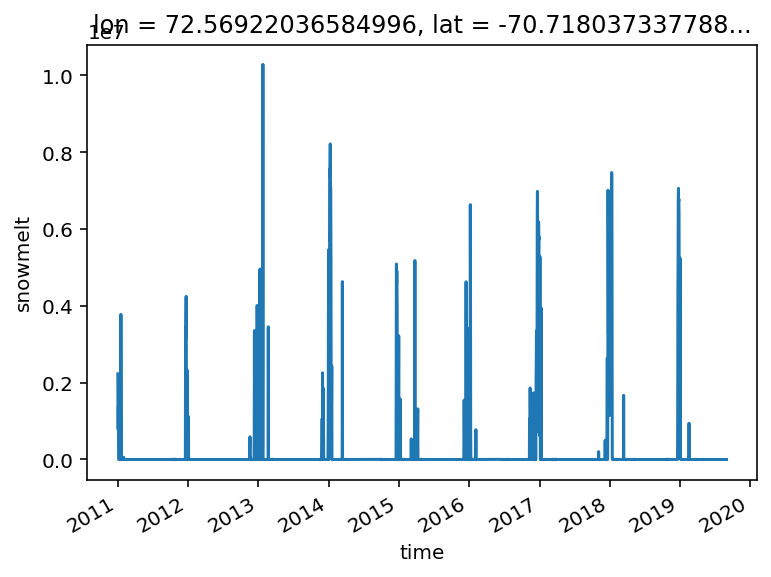

In [13]:
aoi_volume.plot()

### Filter down to DJF

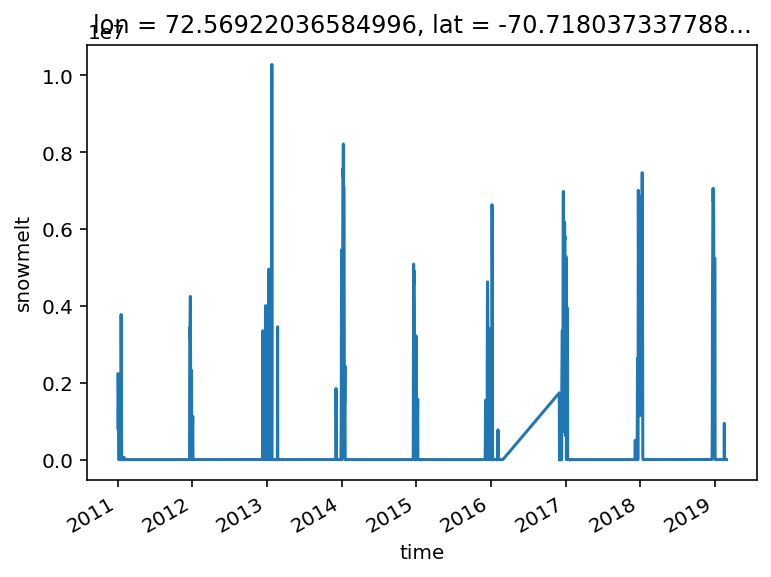

In [14]:
djf_melt = aoi_volume.sel(time=ds.time.dt.season =='DJF')
djf_melt.plot()

### Export to dataframe / csv for further processing

In [17]:
df = djf_melt.to_dataframe().drop('height',1)
# drop all the zeros
df = df[(df!= 0).all('columns')]
df
# df.to_csv(output_path/'RACMO_snowmelt_1119', header = True)

,lon,lat,rlon,rlat,snowmelt
time,,,,,
2011-01-01,72.56922,-70.718037,17.25,8.75,2.230135e+06
2011-01-02,72.56922,-70.718037,17.25,8.75,8.473163e+05
2011-01-03,72.56922,-70.718037,17.25,8.75,7.697449e+05
2011-01-04,72.56922,-70.718037,17.25,8.75,1.390523e+06
2011-01-15,72.56922,-70.718037,17.25,8.75,3.580209e+04
...,...,...,...,...,...
2019-02-13,72.56922,-70.718037,17.25,8.75,1.023629e+03
2019-02-14,72.56922,-70.718037,17.25,8.75,-3.525630e+03
2019-02-15,72.56922,-70.718037,17.25,8.75,2.502001e+03


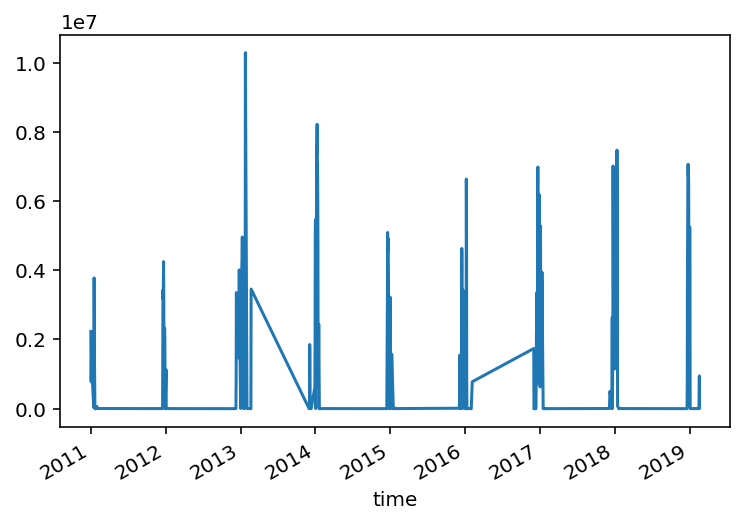

In [16]:
df['snowmelt'].plot()